Enter the month (1-12):  2


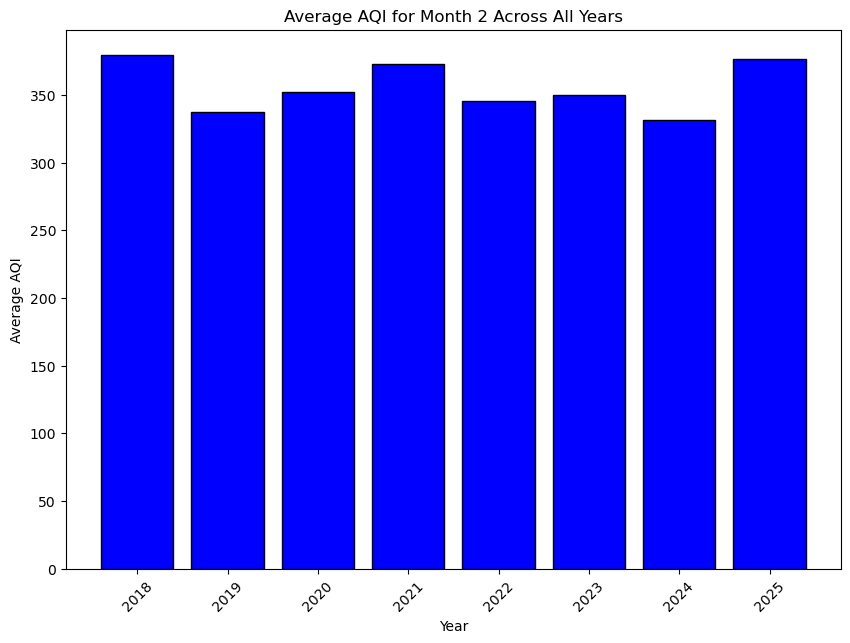

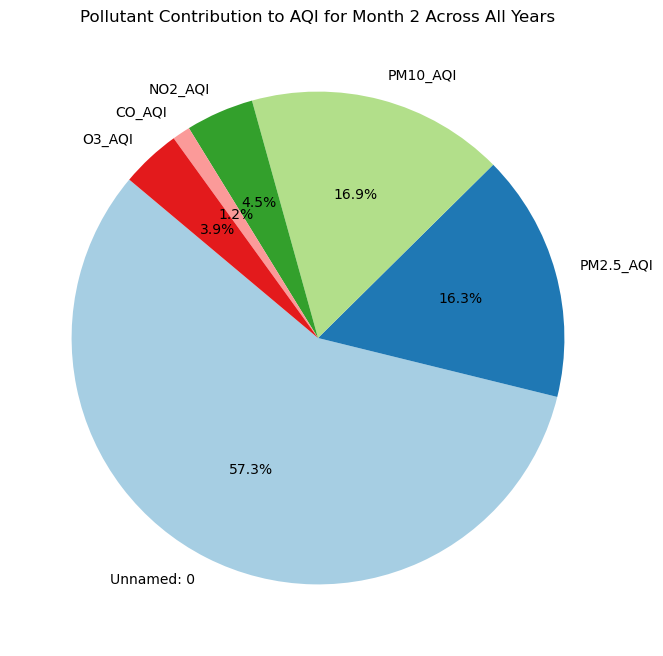

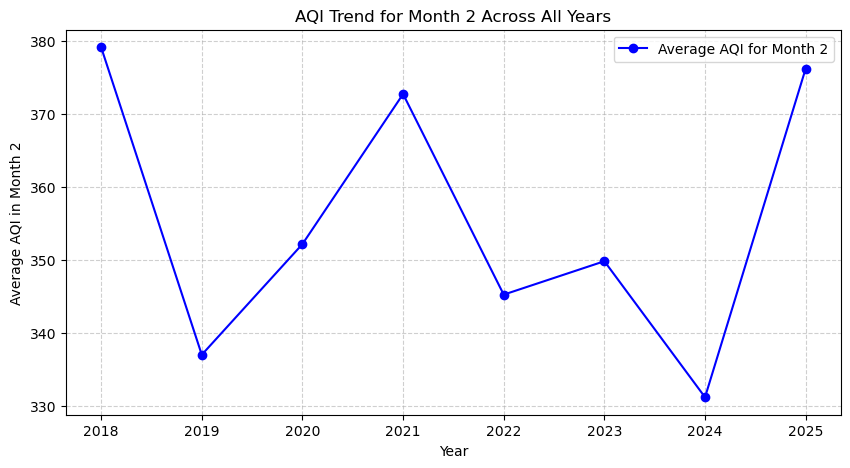

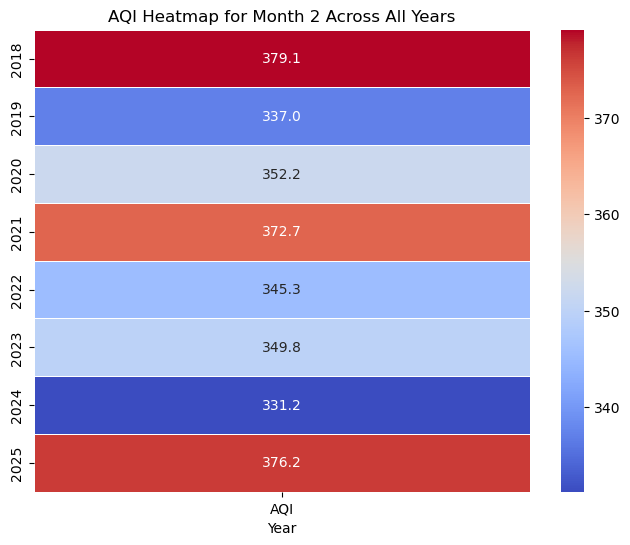

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Final_Dataset.csv")

def plot_aqi_histogram(month):
    # Filter data for the given month across all years
    df_filtered = df[df["month"] == month]
    
    # Group by year and calculate average AQI for the selected month
    aqi_trend = df_filtered.groupby("year")["AQI"].mean()
    
    # Plot the AQI histogram
    plt.figure(figsize=(10, 7))
    plt.bar(aqi_trend.index, aqi_trend.values, color='b', edgecolor="black")
    
    # Labeling
    plt.xlabel("Year")
    plt.ylabel("Average AQI")
    plt.title(f"Average AQI for Month {month} Across All Years")
    
    # Set proper year separation
    plt.xticks(aqi_trend.index, rotation=45)
    
    plt.show()

def plot_pollutant_contribution(month):
    # Filter data for the given month across all years
    df_filtered = df[df["month"] == month]
    
    # Select pollutant columns (assuming common pollutants)
    pollutant_columns = [col for col in df.columns if col not in ["year", "month", "AQI"]]
    
    # Convert pollutant values to numeric, handling errors
    df_filtered[pollutant_columns] = df_filtered[pollutant_columns].apply(pd.to_numeric, errors='coerce')
    
    # Sum pollutants over the filtered data
    pollutant_sums = df_filtered[pollutant_columns].sum()
    
    # Remove pollutants with zero or NaN values
    pollutant_sums = pollutant_sums[pollutant_sums > 0]
    
    if pollutant_sums.empty:
        print(f"No pollutant data available for Month {month} Across All Years.")
        return
    
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(pollutant_sums, labels=pollutant_sums.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f"Pollutant Contribution to AQI for Month {month} Across All Years")
    plt.show()

def plot_aqi_trend(month):
    # Filter data for the given month across all years
    df_filtered = df[df["month"] == month]
    
    # Group by year and calculate average AQI for the selected month
    aqi_trend = df_filtered.groupby("year")["AQI"].mean()
    
    # Plot the AQI trend
    plt.figure(figsize=(10, 5))
    plt.plot(aqi_trend.index, aqi_trend.values, marker="o", linestyle="-", color="b", label=f"Average AQI for Month {month}")
    
    plt.xlabel("Year")
    plt.ylabel(f"Average AQI in Month {month}")
    plt.title(f"AQI Trend for Month {month} Across All Years")
    plt.xticks(aqi_trend.index)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()

def plot_aqi_heatmap(month):
    # Filter data for the given month across all years
    df_filtered = df[df["month"] == month]
    
    # Pivot table for heatmap
    heatmap_data = df_filtered.pivot_table(values="AQI", index="year", aggfunc="mean")
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)
    plt.title(f"AQI Heatmap for Month {month} Across All Years")
    plt.xlabel("Year")
    plt.ylabel("")
    plt.show()
    
# Example usage
month = int(input("Enter the month (1-12): "))
plot_aqi_histogram(month)
plot_pollutant_contribution(month)
plot_aqi_trend(month)
plot_aqi_heatmap(month)
